* Dan Shea
* 2017.09.27
* SNP_Shared_analysis - Generate statistical data and plots based on variant calling data of shared R09 and S11 sequence information mapped to the _B. rapa_ var. Chiifu reference genome

In [1]:
# We want pandas to load in data frames
import pandas as pd

In [2]:
# We want gzip library because we store the large files in gzip compressed format
import gzip

In [3]:
# We need matplotlib for plotting the data
from matplotlib import pyplot as plt

In [4]:
# Numpy for some additional utility while plotting
import numpy as np

In [5]:
# Inline plots for now
%matplotlib inline

In [12]:
# Read in all the data files, store them as DataFrames
R09File  = 'R09-S11-homozygous-variants.snpeff.shared.tsv.gz'
R09FH    = gzip.open(R09File, 'rt')
R09      = pd.read_table(R09FH)

In [13]:
# Check R09 looks OK
R09

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,/dsu0/ResearchData/Shimizu_de_novo/assemblies/resistant_raw_reads_to_Chiifu/R09_Chiifu.sorted.bam
0,A01,1533,.,A,C,84.26360,.,DP=9;VDB=0.251321;SGB=-0.590765;MQSB=1;MQ0F=0;...,GT:PL,"1/1:117,15,0"
1,A01,1550,.,A,G,98.13300,.,DP=6;VDB=0.036809;SGB=-0.616816;MQSB=0.5;MQ0F=...,GT:PL,"1/1:131,18,0"
2,A01,1814,.,A,G,15.87790,.,DP=3;VDB=0.38;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:47,6,0"
3,A01,4684,.,A,G,152.00700,.,DP=11;VDB=0.251186;SGB=-0.670168;MQSB=0.75;MQ0...,GT:PL,"1/1:185,30,0"
4,A01,4935,.,T,C,85.13280,.,DP=7;VDB=0.23129;SGB=-0.616816;MQ0F=0;AF1=1;AC...,GT:PL,"1/1:118,18,0"
5,A01,4960,.,C,A,76.13270,.,DP=6;VDB=0.215799;SGB=-0.616816;MQ0F=0;AF1=1;A...,GT:PL,"1/1:109,18,0"
6,A01,5354,.,C,T,88.13290,.,DP=9;VDB=0.4587;SGB=-0.616816;MQ0F=0;AF1=1;AC1...,GT:PL,"1/1:121,18,0"
7,A01,5362,.,A,T,108.06600,.,DP=9;VDB=0.170074;SGB=-0.636426;MQSB=1;MQ0F=0;...,GT:PL,"1/1:141,21,0"
8,A01,5396,.,G,T,82.51340,.,DP=10;VDB=0.765925;SGB=-0.556411;MQSB=1;MQ0F=0...,GT:PL,"1/1:115,12,0"
9,A01,5411,.,G,C,208.00100,.,DP=13;VDB=0.792905;SGB=-0.680642;MQSB=1;MQ0F=0...,GT:PL,"1/1:241,36,0"


In [14]:
R09_INDELS = R09[R09.INFO.str.startswith('INDEL')]

In [15]:
Chromosomes = ['A01','A02','A03','A04','A05','A06','A07','A08','A09','A10',]

In [16]:
R09_Chromosomes = {key: 0 for key in Chromosomes}

In [17]:
for chromosome in R09_Chromosomes:
    R09_Chromosomes[chromosome] = sum(R09.CHROM == chromosome)

In [18]:
R09_Chromosomes

{'A01': 43237,
 'A02': 37984,
 'A03': 51271,
 'A04': 43986,
 'A05': 49107,
 'A06': 56157,
 'A07': 59443,
 'A08': 43021,
 'A09': 60925,
 'A10': 41382}

In [19]:
R09_Chromosomes_pct = R09_Chromosomes.copy()
for chromosome in R09_Chromosomes:
    R09_Chromosomes_pct[chromosome] = R09_Chromosomes[chromosome] / R09.shape[0]

In [20]:
R09_Chromosomes_pct

{'A01': 0.088871212074497496,
 'A02': 0.078073967191010313,
 'A03': 0.10538464542571319,
 'A04': 0.090410739281375829,
 'A05': 0.10093666561839046,
 'A06': 0.11542754253226532,
 'A07': 0.12218172998460473,
 'A08': 0.08842723627117878,
 'A09': 0.12522789730181927,
 'A10': 0.085058364319144611}

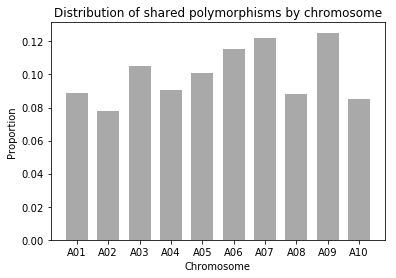

In [21]:
# Make a side-by-side bar plot showing the distribution of polymorphisms found on each chromosome
# for the R09 and S11 genome mappings.
ind = np.arange(len(R09_Chromosomes_pct)) # the x locations for the groups
width = 0.70                                    # the width of the bars
fig, ax = plt.subplots()
R09_rects = ax.bar(ind, R09_Chromosomes_pct.values(), width, color='darkgray')
ax.set_title('Distribution of shared polymorphisms by chromosome')
ax.set_xticks(ind)
ax.set_xticklabels(list(R09_Chromosomes_pct), rotation=0)
ax.set_xlabel('Chromosome')
ax.set_ylabel('Proportion')

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(int(height)),
#                ha='left', va='bottom', rotation=45)

#autolabel(R09_rects)
#autolabel(S11_rects)

plt.savefig('Shared_Polymorphisms_by_chromosome.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
R09_SNPs = R09[R09.INFO.str.startswith('DP=')]

In [23]:
# 2017.04.08 - Fujimoto-sensei requested only SNPs by chromosome
# So, I have added code here to calculate and plot that data
R09_SNP_per_chromosome_counts = {'A01': 0, 'A02': 0, 'A03': 0, 'A04': 0, 'A05': 0,
                             'A06': 0, 'A07': 0, 'A08': 0, 'A09': 0, 'A10': 0,}

for k in R09_SNP_per_chromosome_counts:
    R09_SNP_per_chromosome_counts[k] = sum(R09_SNPs.CHROM == k)


In [24]:
R09_SNP_per_chromosome_counts

{'A01': 38664,
 'A02': 33886,
 'A03': 45491,
 'A04': 38895,
 'A05': 43778,
 'A06': 49680,
 'A07': 52908,
 'A08': 38802,
 'A09': 54189,
 'A10': 36835}

In [25]:
R09_SNP_per_chromosome_pct = R09_SNP_per_chromosome_counts.copy()
# They have the exact same keys, so we can do them both in a single loop
for key in R09_SNP_per_chromosome_pct:
    R09_SNP_per_chromosome_pct[key] = R09_SNP_per_chromosome_pct[key] / R09_SNPs.shape[0]

In [26]:
R09_SNP_per_chromosome_pct

{'A01': 0.089266914168559877,
 'A02': 0.078235533144936364,
 'A03': 0.10502899835614414,
 'A04': 0.089800243807835092,
 'A05': 0.10107404739476553,
 'A06': 0.11470050423893167,
 'A07': 0.12215326647088158,
 'A08': 0.089585526680334676,
 'A09': 0.12511082174322602,
 'A10': 0.085044143994385035}

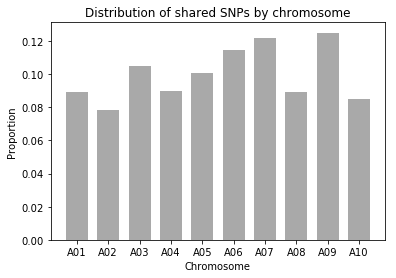

In [27]:
# Make a side-by-side bar plot showing the distribution of SNPs found on each chromosome
# for the R09 and S11 genome mappings.
ind = np.arange(len(R09_SNP_per_chromosome_pct)) # the x locations for the groups
width = 0.70                                    # the width of the bars
fig, ax = plt.subplots()
R09_rects = ax.bar(ind, R09_SNP_per_chromosome_pct.values(), width, color='darkgray')
ax.set_title('Distribution of shared SNPs by chromosome')
ax.set_xticks(ind)
ax.set_xticklabels(list(R09_SNP_per_chromosome_pct), rotation=0)
ax.set_xlabel('Chromosome')
ax.set_ylabel('Proportion')

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(int(height)),
#                ha='left', va='bottom', rotation=45)

#autolabel(R09_rects)
#autolabel(S11_rects)

plt.savefig('Shared_SNPs_by_chromosome.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# For Indel length distributions we can use previously created R09_INDELS
R09_INDEL_sizes = dict()
for ref, alt_list in zip(R09_INDELS.REF.apply(len), R09_INDELS.ALT.apply(str.split, args=(','))):
    for alt in alt_list:
        delta = ref - len(alt)
        if delta in R09_INDEL_sizes:
            R09_INDEL_sizes[delta] += 1
        else:
            R09_INDEL_sizes[delta] = 1


In [29]:
# Convert to percentages to plot distribution
R09_INDEL_sizes_pct = {key: R09_INDEL_sizes[key]/sum(R09_INDEL_sizes.values()) for key in R09_INDEL_sizes}


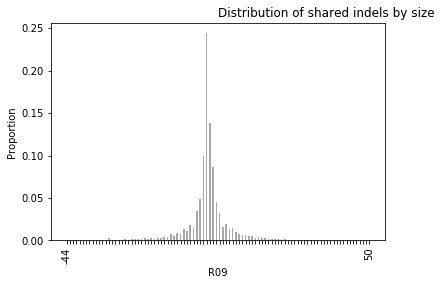

In [30]:
# Plot the calculated size distributions of indels for each genome using
ind1 = np.arange(len(R09_INDEL_sizes_pct)) # the x locations for R09
width = 0.5                                # the width of the bars
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # Two plots side by side sharing the y-axis
fig, ax = plt.subplots()

R09_rects = ax.bar(ind1, [R09_INDEL_sizes_pct[k] for k in sorted(R09_INDEL_sizes_pct.keys())], width, color='darkgray')
ax.set_xticks(ind1)
R09_ticks = sorted(R09_INDEL_sizes_pct.keys())
ax.set_xticklabels([min(R09_ticks)]+['' for i in range(len(ind1)-2)]+[max(R09_ticks)], ha='center', rotation=90)

ax.set_title('Distribution of shared indels by size', ha='left')
ax.set_xlabel('R09')
ax.set_ylabel('Proportion')

#ax.set_yticks(np.arange(0,1.1,0.2))
#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(height),
#                ha='left', va='bottom', rotation=45)
#
#autolabel(R09_rects)
#autolabel(S11_rects)
plt.savefig('Shared_Indels_by_size.png', dpi=300, bbox_inches='tight')
plt.show()